In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import requests #download from football data
import io 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
url = "http://football-data.co.uk/mmz4281/1920/E0.csv"


testfile = requests.get(url).content
df=pd.read_csv(io.StringIO(testfile.decode('utf-8')))
df.to_csv("E0_1920.csv")

In [3]:
df = pd.read_csv("E0_1920.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG',
       'FTAG', 'FTR', 'HTHG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=107)

In [5]:
df.head()

,Unnamed: 0,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [6]:
res_16 = df.iloc[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1)
res_16.head()

,Unnamed: 0,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY
0,0,20:00,Liverpool,Norwich,4,1,H,4,0,H,...,15,12,7,5,9,9,11,2,0,2
1,1,12:30,West Ham,Man City,0,5,A,0,1,A,...,5,14,3,9,6,13,1,1,2,2
2,2,15:00,Bournemouth,Sheffield United,1,1,D,0,0,D,...,13,8,3,3,10,19,3,4,2,1
3,3,15:00,Burnley,Southampton,3,0,H,0,0,D,...,10,11,4,3,6,12,2,7,0,0
4,4,15:00,Crystal Palace,Everton,0,0,D,0,0,D,...,6,10,2,3,16,14,6,2,2,1


In [7]:
feature_table = df.iloc[:,:23]
feature_table.head()

,Unnamed: 0,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY
0,0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,...,15,12,7,5,9,9,11,2,0,2
1,1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,...,5,14,3,9,6,13,1,1,2,2
2,2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,...,13,8,3,3,10,19,3,4,2,1
3,3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,...,10,11,4,3,6,12,2,7,0,0
4,4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,...,6,10,2,3,16,14,6,2,2,1


In [8]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS


In [9]:
res_16.shape

(259, 21)

In [10]:
team = res_16.HomeTeam.unique()
avg_home_scored_16 = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_away_scored_16 = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_home_conceded_16 = avg_away_scored_16
avg_away_conceded_16 = avg_home_scored_16
print("Average number of goals at home",avg_home_scored_16)
print("Average number of goals away", avg_away_scored_16)
print("Average number of goals conceded at home",avg_home_conceded_16)
print("Average number of goals conceded away",avg_away_conceded_16)

Average number of goals at home 1.4787644787644787
Average number of goals away 1.281853281853282
Average number of goals conceded at home 1.281853281853282
Average number of goals conceded away 1.4787644787644787


In [11]:
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

In [12]:
table_16.Team = team
table_16.HGS = res_home.FTHG.sum().values
table_16.HGC = res_home.FTAG.sum().values
table_16.AGS = res_away.FTAG.sum().values
table_16.AGC = res_away.FTHG.sum().values

In [13]:
num_games = res_16.shape[0]/20

In [14]:
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16

In [15]:
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Liverpool,22,14,1.148825,0.843373,18,16,1.084337,0.835509
1,West Ham,18,16,0.939948,0.963855,24,26,1.445783,1.357702
2,Bournemouth,15,11,0.783290,0.662651,19,21,1.144578,1.096606
3,Burnley,17,14,0.887728,0.843373,14,24,0.843373,1.253264
4,Crystal Palace,16,14,0.835509,0.843373,18,21,1.084337,1.096606
5,Watford,16,27,0.835509,1.626506,14,22,0.843373,1.148825
6,Tottenham,10,13,0.522193,0.783133,13,19,0.783133,0.992167
7,Leicester,18,16,0.939948,0.963855,14,24,0.843373,1.253264
8,Newcastle,26,28,1.357702,1.686747,14,12,0.843373,0.626632
9,Man United,35,26,1.827676,1.566265,9,6,0.542169,0.313316


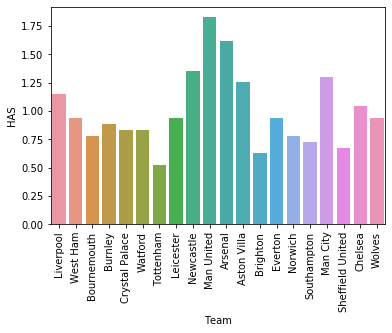

In [16]:
has_plot = sns.barplot(table_16.Team,table_16.HAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

In [17]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [18]:
feature_table.head()

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Liverpool,Norwich,H,7,5,1.148825,1.084337,0.783133,0.626632
1,West Ham,Man City,A,3,9,0.939948,1.445783,1.084337,1.148825
2,Bournemouth,Sheffield United,D,3,3,0.783290,1.144578,0.662651,1.201044
3,Burnley,Southampton,H,4,3,0.887728,0.843373,1.084337,0.939948
4,Crystal Palace,Everton,D,2,3,0.835509,1.084337,0.361446,1.148825


In [19]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [20]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [21]:
feature_table

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
0,Liverpool,Norwich,H,7,5,1.148825,1.084337,0.783133,0.626632,1
1,West Ham,Man City,A,3,9,0.939948,1.445783,1.084337,1.148825,-1
2,Bournemouth,Sheffield United,D,3,3,0.783290,1.144578,0.662651,1.201044,0
3,Burnley,Southampton,H,4,3,0.887728,0.843373,1.084337,0.939948,1
4,Crystal Palace,Everton,D,2,3,0.835509,1.084337,0.361446,1.148825,0
5,Watford,Brighton,A,3,3,0.835509,0.843373,0.722892,1.462141,-1
6,Tottenham,Aston Villa,H,7,4,0.522193,0.783133,0.843373,0.887728,1
7,Leicester,Wolves,D,1,2,0.939948,0.843373,1.024096,0.783290,0
8,Newcastle,Arsenal,A,2,2,1.357702,0.843373,2.048193,0.887728,-1
9,Man United,Chelsea,H,5,7,1.827676,0.542169,0.602410,0.939948,1


In [22]:
X_train = feature_table[['HAS','HDS','AAS','ADS']][:-10]
y_train = feature_table['Result'][:-10]
X_test = feature_table[['HAS','HDS','AAS','ADS']].tail(10)
y_test = feature_table['Result'][:-10].tail(10)

In [23]:
X_predict = pd.DataFrame(columns=('HAS','HDS','AAS','ADS'))

In [24]:
HAS = table_16[table_16['Team'] == 'Norwich']['HAS'].values[0]
HDS = table_16[table_16['Team'] == 'Norwich']['HDS'].values[0]
AAS = table_16[table_16['Team'] == 'Liverpool']['AAS'].values[0]
ADS = table_16[table_16['Team'] == 'Liverpool']['ADS'].values[0]

In [25]:
X_predict = X_predict.append({
    'HAS': HAS,
    'HDS': HDS,
    'AAS': AAS,
    'ADS': ADS
}, ignore_index=True)

In [26]:
X_predict

,HAS,HDS,AAS,ADS
0,0.78329,0.722892,0.843373,0.835509


In [27]:
clf_logreg = LogisticRegression(C=1.0,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)
y_pred_logreg = clf_logreg.predict(X_test)
y_pred_logreg

array([ 1, -1,  1,  1,  1, -1,  1,  1,  1,  1])

In [28]:
y_test

239   -1
240    0
241    1
242   -1
243    1
244    0
245   -1
246    0
247    0
248    0
Name: Result, dtype: int64